# 五王之战分析 - 冰与火之歌

## 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name: 战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

## 项目完成指南



本项目中的数据分析流程已经给出，但代码将完全由你自己进行书写，如果你无法完成本项目，说明你目前的能力并不足以完成 数据分析(进阶)纳米学位，建议先进行 数据分析（入门）纳米学位的学习，掌握进阶课程的先修知识。

对于数据分析过程的记录也是数据分析报告的一个重要部分，你可以自己在需要的位置插入Markdown cell，记录你在数据分析中的关键步骤和推理过程。比如：数据有什么样的特点，统计数据的含义是什么，你从可视化中可以得出什么结论，下一步分析是什么，为什么执行这种分析。如果你无法做到这一点，你也无法通过本项目。

## 提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。在你分析数据之前，请先思考几个你需要理解的关于这些战斗的问题，例如，哪一个区域发生了最多的战争？哪一个国王获得了最多的胜利？战争的胜利与否受那些关键因素的影响？

**问题**：请写下你感兴趣的问题，请确保这些问题能够由现有的数据进行回答。
（为了确保学习的效果，请确保你的数据分析报告中能够包含2幅可视化和1个相关性分析。）

**答案**：问题一：进攻方的军队数量会不会影响战争结果？问题2：战争的类别是不是对攻击方的胜率有影响？


在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。

## 数据评估和清理

In [2]:
# TO DO: load pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# TO DO: load the dataset
df = pd.read_csv('battles.csv')
df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
# TO DO: check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [5]:
# TO DO: clean the data (optional: only there are problems)
df.duplicated().sum()

0

In [6]:
df.isnull().any()

name                  False
year                  False
battle_number         False
attacker_king          True
defender_king          True
attacker_1            False
attacker_2             True
attacker_3             True
attacker_4             True
defender_1             True
defender_2             True
defender_3             True
defender_4             True
attacker_outcome       True
battle_type            True
major_death            True
major_capture          True
attacker_size          True
defender_size          True
attacker_commander     True
defender_commander     True
summer                 True
location               True
region                False
note                   True
dtype: bool

In [7]:
#according to questions above,there are two colunms‘ missing data need to be filled,and one row need to be deleted
df['attacker_size'].fillna(df['attacker_size'].mean() , inplace = True)
df['defender_size'].fillna(df['defender_size'].mean() , inplace = True)
df.drop(df.index[-1] , inplace = True)
df.isnull().any()

name                  False
year                  False
battle_number         False
attacker_king          True
defender_king          True
attacker_1            False
attacker_2             True
attacker_3             True
attacker_4             True
defender_1             True
defender_2             True
defender_3             True
defender_4             True
attacker_outcome      False
battle_type           False
major_death           False
major_capture         False
attacker_size         False
defender_size         False
attacker_commander     True
defender_commander     True
summer                 True
location               True
region                False
note                   True
dtype: bool

## 数据探索分析

根据所提出的问题，我们需要研究的数据包括attacker_size、defender_size、attacker_outcome、battle_type

In [8]:
# In exploratory data analysis, please make sure of using statistics and visualizations
#Find the data we need and built a new dataframe
df2 = df.groupby(['attacker_size' , 'defender_size' , 'attacker_outcome' , 'battle_type']).count().reset_index()
df2.drop(df2.columns[range(4,25)] , axis = 1 , inplace = True)
df2.head()

,attacker_size,defender_size,attacker_outcome,battle_type
0,20.0,6428.157895,win,ambush
1,100.0,100.000000,win,ambush
2,244.0,900.000000,win,pitched battle
3,264.0,6428.157895,win,ambush
4,618.0,2000.000000,win,ambush


在数据的探索性分析中，请确保你对数据分析中的关键步骤和推理过程进行了记录。你可以自己插入code cell和markdown cell来组织你的报告。

问题一需要我们统计进攻方与防守方的军队数量差，建立新的列，并进行统计分析。在这里只统计win和lose的次数。

In [9]:
#set the new column of the defference between attackers and defenders
df2['size_diff'] = df['attacker_size'] - df['defender_size']
df2.head()

,attacker_size,defender_size,attacker_outcome,battle_type,size_diff
0,20.0,6428.157895,win,ambush,11000.000000
1,100.0,100.000000,win,ambush,9822.541667
2,244.0,900.000000,win,pitched battle,5000.000000
3,264.0,6428.157895,win,ambush,-2000.000000
4,618.0,2000.000000,win,ambush,-4125.000000


In [10]:
#Use statistics and visualizations
#Creat dummies
%matplotlib inline
df2[['lose' , 'win']] = pd.get_dummies(df2['attacker_outcome'])

In [18]:
#Use statistics
attack_amount = df2.query('size_diff > 0')['win'].mean()
attack_less = df2.query('size_diff <= 0')['win'].mean()
attack_amount , attack_less

(0.8, 0.8571428571428571)

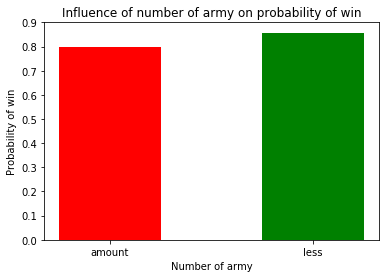

In [35]:
#Use summary graph
number_list = [attack_amount , attack_less]
name_list = ['amount' , 'less']
plt.bar(name_list , number_list , width = 0.5 , color = 'rgb')
plt.xlabel('Number of army')
plt.ylabel('Probability of win')
plt.title('Influence of number of army on probability of win')
plt.show()

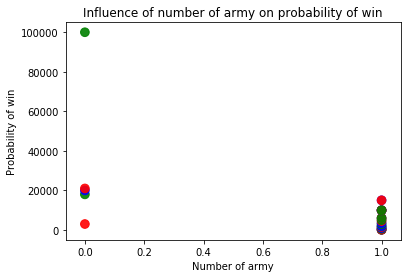

In [42]:
plt.scatter(df2['win'] , df2['attacker_size'] , s = 75 , color = 'rgb' , alpha = 0.9)
plt.xlabel('Number of army')
plt.ylabel('Probability of win')
plt.title('Influence of number of army on probability of win')
plt.show()

回答：在以上的统计结果可以看出，进攻方的军队数量多于和少于防守方的两种情况中，胜率基本接近，但是在散点图中，可以看出获胜时大部分时候军队数量在20000人以下，所有20000左右的军队数量获胜率更高。

问题二：战争类型是不是对进攻方的胜率有影响。

In [26]:
pit_win = df2.query('battle_type == "pitched battle"')['win'].mean()
amb_win = df2.query('battle_type == "ambush"')['win'].mean()
raz_win = df2.query('battle_type == "razing"')['win'].mean()
sie_win = df2.query('battle_type == "siege"')['win'].mean()
pit_win , amb_win , raz_win , sie_win

(0.6, 1.0, 1.0, 0.875)

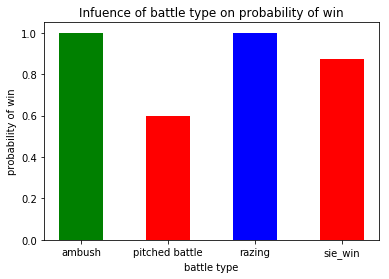

In [43]:
name_list2 = ['pitched battle' , 'ambush' , 'razing' , 'sie_win']
number_list2 = [pit_win , amb_win , raz_win , sie_win]
plt.bar(name_list2 ,number_list2 , width = 0.5 , color = 'rgb')
plt.xlabel('battle type')
plt.ylabel('probability of win')
plt.title('Infuence of battle type on probability of win')
plt.show()

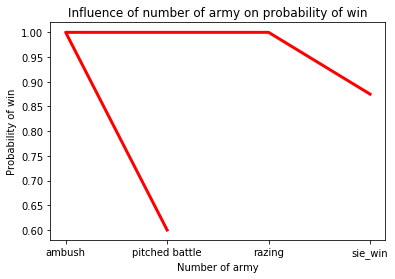

In [45]:
plt.plot(name_list2 , number_list2 , linewidth = 3 , color = 'r')
plt.xlabel('Number of army')
plt.ylabel('Probability of win')
plt.title('Influence of number of army on probability of win')
plt.show()

回答：从以上分析结果可以看出，战争类型为ambush和razing时，进攻方全部胜利，其次战争类型为siege时胜率较高，为80%，胜率最低的战争类型是pitched battle,有60%的胜率。战争类型对进攻方的胜率有着明显的影响。

## 得出结论

**问题**：上面的分析能够回答你提出的问题？通过这些分析你能够得出哪些结论？

**答案**：从以上分析结果可以看出，进攻方军队数量越多不会影响进攻方的胜率，数量为20000或者以下的人数可能胜率更高，而战争类型对进攻方获胜有着比较大的影响。

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：1、数据集不是非常完整，我在这里对数据集进行了一定的清理，包括删除和填补空缺值。
         2、我的操作有可能影响结论，比如填补军队数量时用平均值进行填补，但是这里的信息量严重不足，平局值是对结果影响小最好的方式。
         3、有，比如防守方的防守方式，是阵地还是建筑，这些对结果有着很大的影响，如果有这些数据分析结果会更加接近影响胜率的结果。
         4、我对结果所做的都是相关性分析，不会在这里分析因果性。

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。